In [44]:
import os
import re
from collections import Counter
from pathlib import Path

import pandas as pd
import scanpy as sc
import tifffile
from PIL import Image

In [45]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
%autoreload 2

In [47]:
from violet.utils.preprocessing import process_adata, extract_st_tiles

In [48]:
filemap = pd.read_csv('/home/estorrs/spatial-analysis/data/sample_map.txt', sep='\t')
filemap = filemap[~pd.isnull(filemap['highres_image'])]
filemap

sample_id                                 spaceranger_output  \
0   HT206B1_H8_U2  /data/spatial_transcriptomics/spaceranger_outp...   
1   HT206B1_H8_U3  /data/spatial_transcriptomics/spaceranger_outp...   
2   HT206B1_H8_U4  /data/spatial_transcriptomics/spaceranger_outp...   
3   HT206B1_H8_U5  /data/spatial_transcriptomics/spaceranger_outp...   
5   HT235B1_H1_U1  /data/spatial_transcriptomics/spaceranger_outp...   
..            ...                                                ...   
89   NMK_20201012  /data/spatial_transcriptomics/spaceranger_outp...   
90      AKICL_14w  /data/spatial_transcriptomics/spaceranger_outp...   
91      AKI_M_14w  /data/spatial_transcriptomics/spaceranger_outp...   
92    SP1896H1_U1  /data/spatial_transcriptomics/spaceranger_outp...   
93     HT291C1_U1  /data/spatial_transcriptomics/spaceranger_outp...   

                                        highres_image         disease  \
0   /data/spatial_transcriptomics/highres_images/b...            brca   
1   /data/spatial_transcriptomics/highres_images/b...            brca   
2   /data/spatial_transcriptomics/highres_images/b...            brca   
3   /data/spatial_transcriptomics/highres_images/b...            brca   
5   /data/spatial_transcriptomics/highres_images/b...            brca   
..                                                ...             ...   
89  /data/spatial_transcriptomics/highres_images/m...    mouse_kidney   
90  /data/spatial_transcriptomics/highres_images/m...    mouse_kidney   
91  /data/spatial_transcriptomics/highres_images/m...    mouse_kidney   
92  /data/spatial_transcriptomics/highres_images/i...  normal_stomach   
93  /data/spatial_transcriptomics/highres_images/i...    normal_liver   

   tissue_type  
0          oct  
1          oct  
2          oct  
3          oct  
5          oct  
..         ...  
89         oct  
90         oct  
91         oct  
92         oct  
93         oct  

[92 rows x 5 columns]

In [49]:
Counter(filemap['disease']).most_common()

[('mouse_kidney', 24),
 ('brca', 22),
 ('pdac', 17),
 ('co', 7),
 ('co_met', 6),
 ('ccrcc', 4),
 ('cholangiocarcinoma', 2),
 ('lusl_pdx', 2),
 ('ucec', 2),
 ('brca_met', 1),
 ('gbm', 1),
 ('mouse_bladder', 1),
 ('mouse_prostate', 1),
 ('normal_stomach', 1),
 ('normal_liver', 1)]

In [50]:
# keep = [d for d in set(filemap['disease'])
#         if d=='mouse_kidney']
# filemap = filemap[[True if d in keep and t == 'oct' else False
#                   for d, t in zip(filemap['disease'], filemap['tissue_type'])]]
# filemap

In [51]:
keep = [d for d in set(filemap['disease'])
        if d=='ccrcc']
filemap = filemap[[True if d in keep and t == 'ffpe' else False
                  for d, t in zip(filemap['disease'], filemap['tissue_type'])]]
filemap

sample_id                                 spaceranger_output  \
42  HT282N1_S1H3Fs4U1  /data/spatial_transcriptomics/spaceranger_outp...   
43  HT293N1_S1H3Fs1U1  /data/spatial_transcriptomics/spaceranger_outp...   

                                        highres_image disease tissue_type  
42  /data/spatial_transcriptomics/highres_images/c...   ccrcc        ffpe  
43  /data/spatial_transcriptomics/highres_images/c...   ccrcc        ffpe

In [52]:
data_map = {row['sample_id']: {'spatial': row['spaceranger_output'], 'tif': row['highres_image']}
            for i, row in filemap.iterrows()}

In [55]:
imgs, img_ids = extract_st_tiles(data_map)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/staintools/miscellaneous/miscellaneous_functions.py:26: RuntimeWarning: invalid value encountered in true_divide
  return A / np.linalg.norm(A, axis=1)[:, None]
/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/staintools/stain_normalizer.py:41: RuntimeWarning: divide by zero encountered in true_divide
  source_concentrations *= (self.maxC_target / maxC_source)
/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/staintools/stain_normalizer.py:41: RuntimeWarning: invalid value encountered in multiply
  source_concentrations *= (self.maxC_target / maxC_source)


In [56]:
len(imgs)

6552

In [57]:
img_ids[:2], imgs[:2]

(['HT282N1_S1H3Fs4U1_AAACAAGTATCTCCCA-1',
  'HT282N1_S1H3Fs4U1_AAACAATCTACTAGCA-1'],
 [array([[[219, 138, 172],
          [230, 145, 176],
          [231, 150, 180],
          ...,
          [194, 101, 141],
          [206, 106, 145],
          [214, 112, 150]],
  
         [[204, 119, 157],
          [227, 134, 167],
          [230, 143, 175],
          ...,
          [205, 110, 149],
          [216, 113, 151],
          [226, 131, 165]],
  
         [[199, 117, 156],
          [227, 136, 169],
          [231, 150, 180],
          ...,
          [200, 109, 149],
          [213, 117, 154],
          [227, 134, 167]],
  
         ...,
  
         [[243, 196, 215],
          [246, 212, 226],
          [248, 220, 232],
          ...,
          [ 62,  30,  76],
          [ 59,  29,  75],
          [ 58,  31,  78]],
  
         [[244, 202, 219],
          [246, 209, 224],
          [247, 217, 229],
          ...,
          [ 57,  26,  70],
          [ 50,  25,  69],
          [ 53,  27,  73

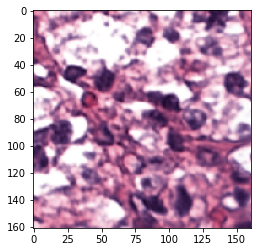

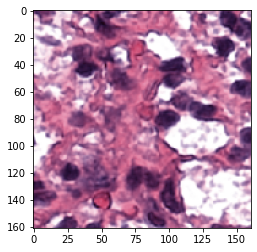

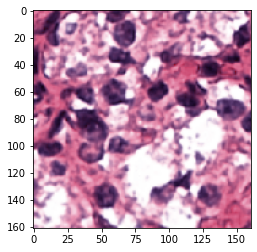

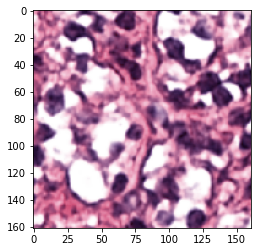

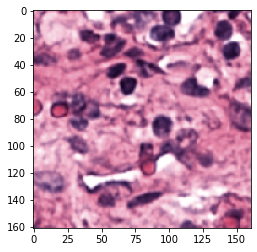

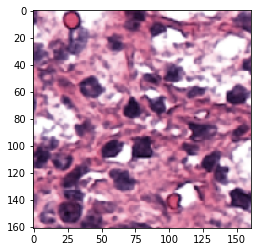

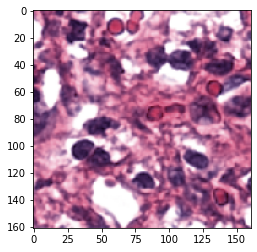

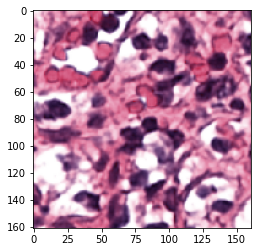

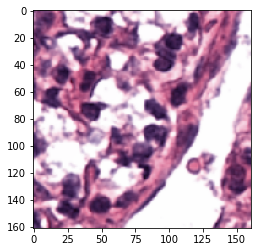

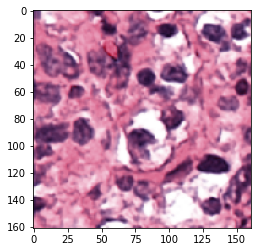

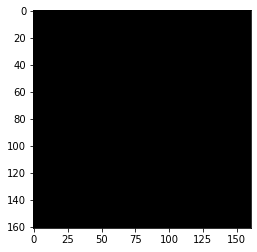

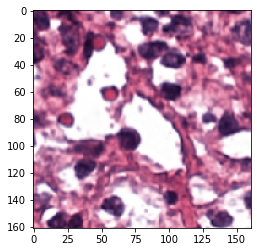

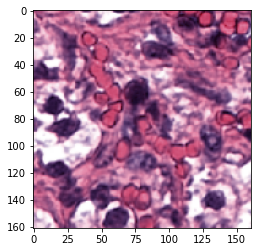

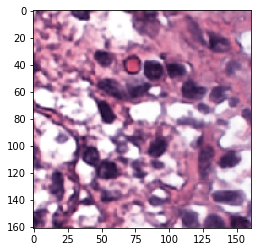

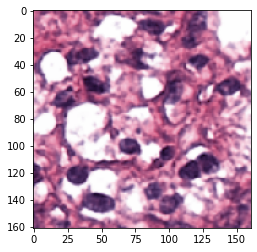

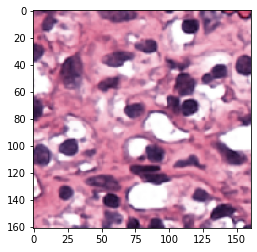

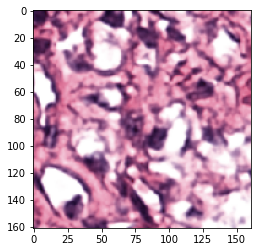

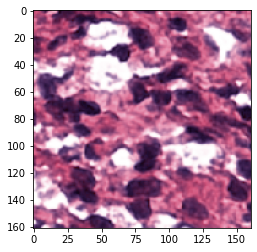

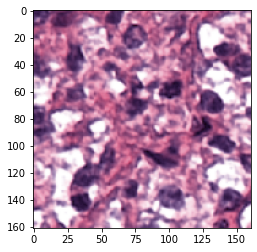

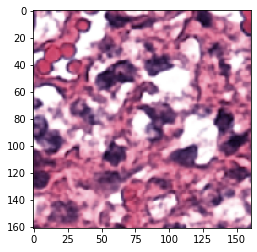

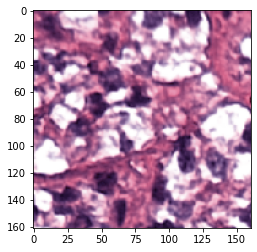

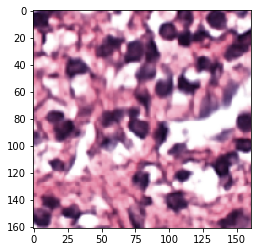

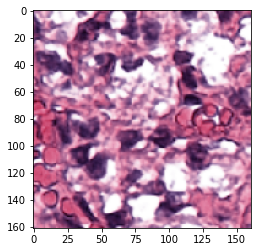

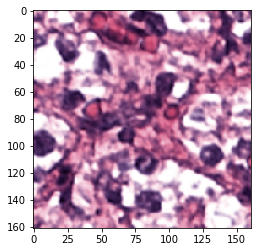

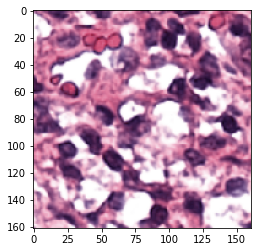

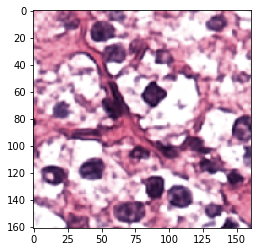

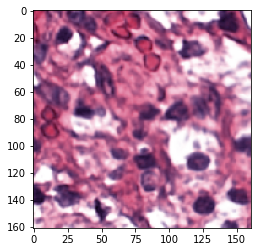

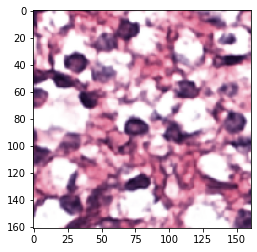

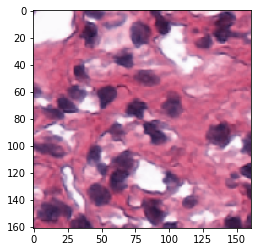

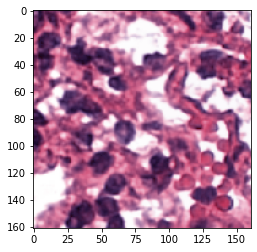

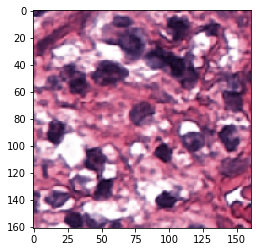

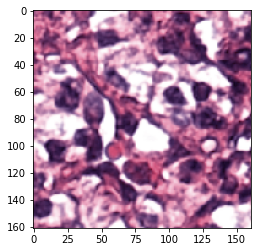

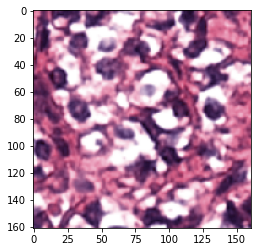

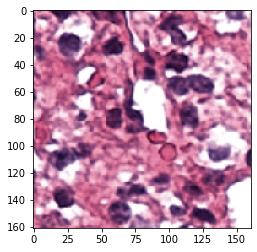

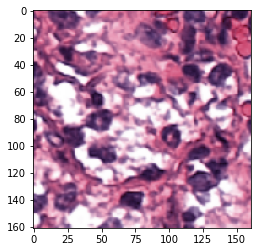

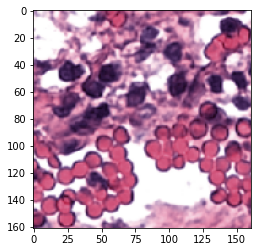

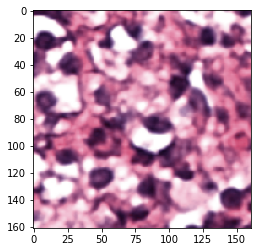

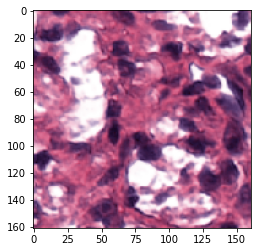

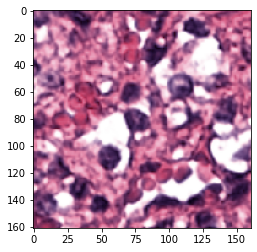

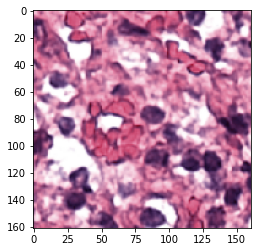

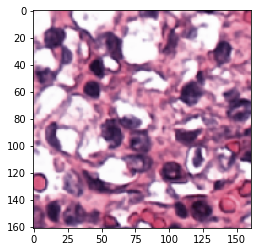

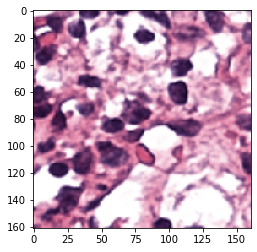

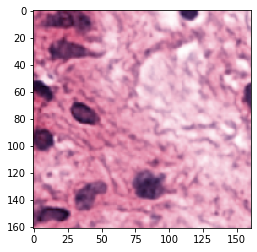

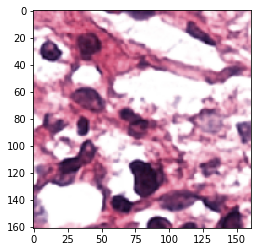

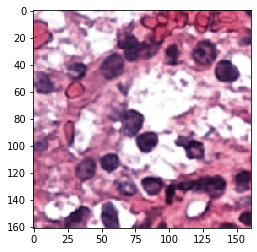

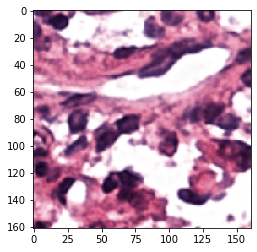

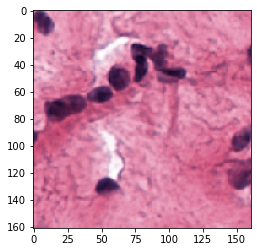

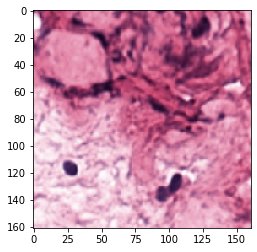

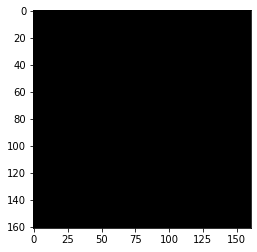

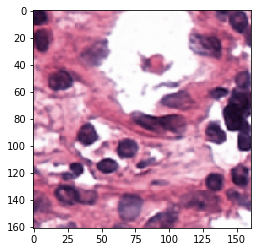

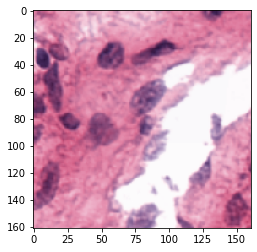

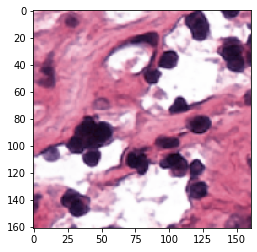

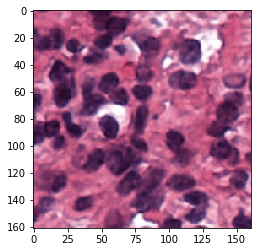

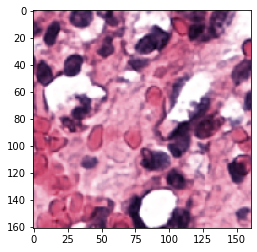

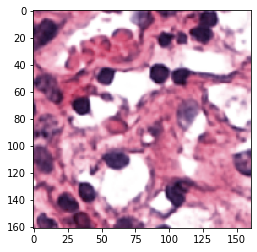

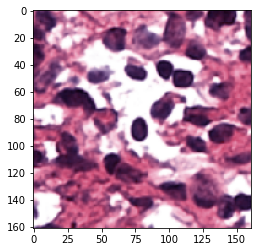

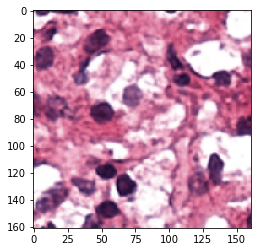

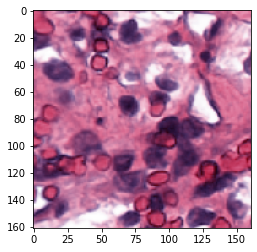

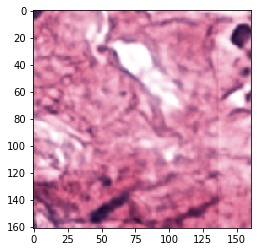

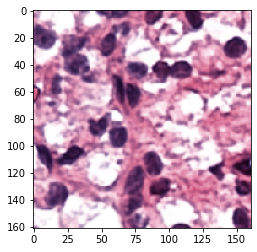

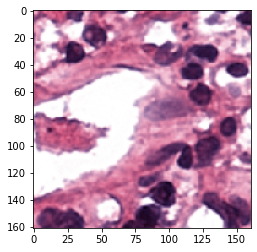

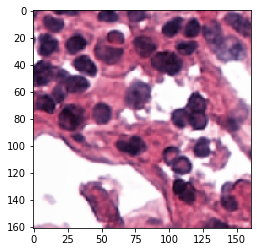

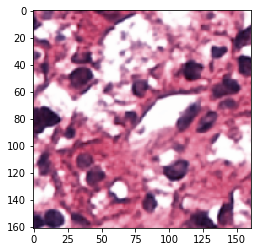

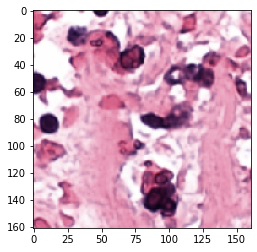

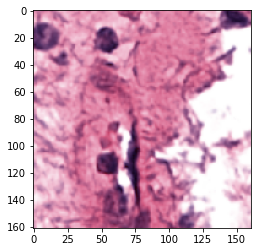

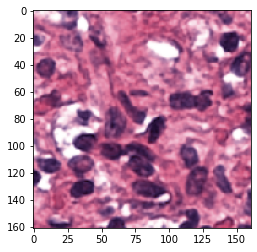

In [58]:
import matplotlib.pyplot as plt
for i, img in enumerate(imgs):
    if i % 100 == 0:
        plt.imshow(img)
        plt.show()

In [59]:
output_dir = '/home/estorrs/violet/data/st/ccrcc_ffpe_08032021_normalized'
samples = sorted(data_map.keys())
val_samples = []
for sample in samples:
    if sample not in val_samples:
        Path(os.path.join(output_dir, 'train', sample)).mkdir(parents=True, exist_ok=True)
    else:
        Path(os.path.join(output_dir, 'val', sample)).mkdir(parents=True, exist_ok=True)

In [60]:
for img, img_id in zip(imgs, img_ids):
    sample = '_'.join(img_id.split('_')[:-1])
    im = Image.fromarray(img)
    
    if sample in val_samples:
        im.save(os.path.join(output_dir, 'val', sample, f'{img_id}.jpeg'))
    else:
        im.save(os.path.join(output_dir, 'train', sample, f'{img_id}.jpeg'))

###### spot check location of image

In [21]:
import matplotlib.pyplot as plt

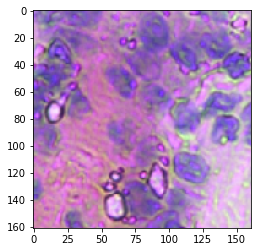

In [52]:
s = 192487
plt.imshow(imgs[s])

In [48]:
img_ids[s]

'HT112C1_U1_AAACTCGGTTCGCAAT-1'

In [47]:
[(i, x) for i, x in enumerate(img_ids) if 'RCC' in x][:5]

[(192483, 'RCC001_AAACAAGTATCTCCCA-1'),
 (192484, 'RCC001_AAACACCAATAACTGC-1'),
 (192485, 'RCC001_AAACAGAGCGACTCCT-1'),
 (192486, 'RCC001_AAACAGCTTTCAGAAG-1'),
 (192487, 'RCC001_AAACAGGGTCTATATT-1')]

In [27]:
s_id = '_'.join(img_ids[s].split('_')[:-1])
a = sc.read_visium(filemap.set_index('sample_id').loc[s_id, 'spaceranger_output'])
a.obs.index = [f'{s_id}_{i}' for i in a.obs.index]
a.obs['highlight'] = ['A' if i==img_ids[s] else 'B'
                     for i in a.obs.index]
sc.pl.spatial(a, color='highlight')

NameError: name 's' is not defined

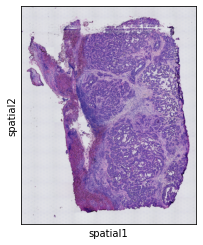

In [50]:
sc.pl.spatial(a)

In [31]:
a = sc.read_visium(filemap.set_index('sample_id').loc['NMK_20201012', 'spaceranger_output'])
a.uns['spatial'][list(a.uns['spatial'].keys())[0]]['scalefactors']['spot_diameter_fullres']

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


181.48018639605988

In [ ]:
sc.pl.spatial(a)

In [29]:
list(a.uns['spatial'].keys())[0]

'Colorectal_112C1_1'

In [30]:
a.uns['spatial'][list(a.uns['spatial'].keys())[0]]

{'images': {'hires': array([[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
  
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
  
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
  
         ...,
  
         [[0.69803923, 0.69803923, 0.698039